In [43]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(list(data.columns), end = ', ')

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], 

## Normalizing the Amount feature in both datasets:

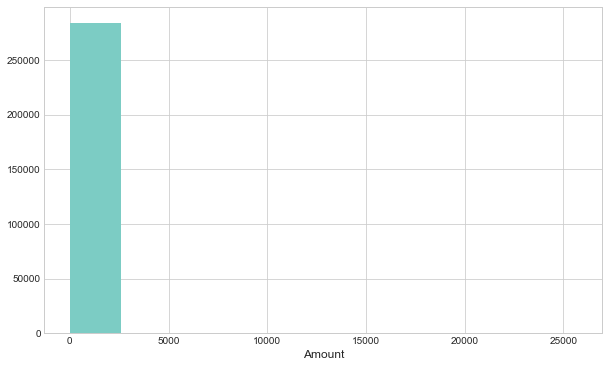

In [4]:
plt.style.use("seaborn-whitegrid")
data['Amount'].hist(color = sns.color_palette("GnBu_r", 1), figsize = (10, 6))
plt.xlabel("Amount", fontsize = 12)
plt.show()

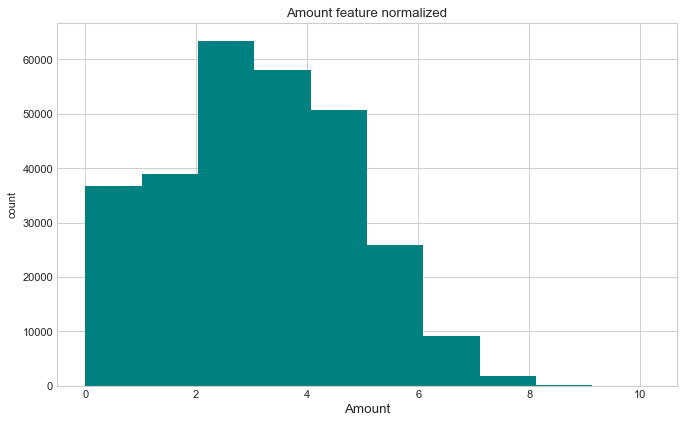

In [5]:
# --- Normalized 'Amount' feature ---
plt.figure(figsize=(10, 6), dpi = 80)
plt.hist(np.log(data['Amount']+1), color = 'teal')
plt.xlabel("Amount", fontsize = 12)
plt.ylabel("count")
plt.title("Amount feature normalized")
plt.show()

In [6]:
data['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [7]:
data["Amount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
data["Amount"].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

## Imbalanced Target feature.

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

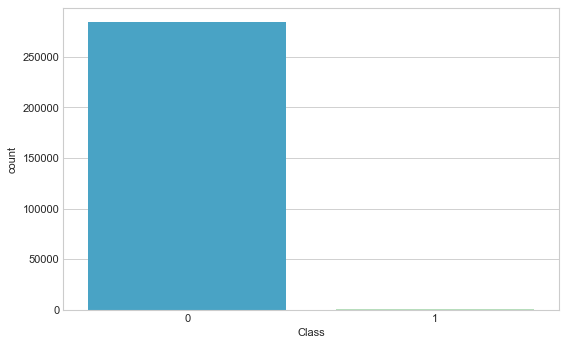

In [9]:
plt.figure(figsize=(8, 5), dpi = 80)
sns.countplot(data['Class'], palette="GnBu_r", saturation = .9);

In [10]:
class_count_0, class_count_1 = data['Class'].value_counts()

class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

print(f"class 0: {class_0.shape} | class 1: {class_1.shape}")

class 0: (284315, 31) | class 1: (492, 31)


## Undersampling to balance the imbalanced dataset:

In [11]:
class_0_under = class_0.sample(class_count_1)

data_under = pd.concat([class_0_under, class_1], axis = 0)
data_under['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

## Oversampling:

In [12]:
class_1_over = class_1.sample(class_count_0, replace = True)

data_over = pd.concat([class_1_over, class_0], axis = 0)
data_over['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [13]:
# --- Remove Time feature from both datasets ---
data_under.drop(['Time'], axis = 1, inplace = True)
data_over.drop(['Time'], axis = 1, inplace = True)

In [14]:
y_under = data_under.pop('Class')
X_under = data_under
# ------------------------------
y_over = data_over.pop('Class')
X_over = data_over

In [15]:
X_over.shape, X_under.shape

((568630, 29), (984, 29))

## Split the datasets:

In [16]:
train_inputs, test_inputs, train_target, test_target = tts(X_under, y_under, test_size = .20, random_state = 42)
# -----------
trainInputs, testInputs, trainTarget, testTarget = tts(X_over, y_over, test_size = .30, random_state = 42) 

## Model fitting on udersampled dataset:

In [17]:
logistic = LogisticRegression(C = 100, 
                              penalty = "l1", 
                              max_iter = 200, 
                              solver = 'liblinear').fit(train_inputs, train_target)

In [18]:
print(f"training accuracy: {round(logistic.score(train_inputs, train_target), 3)}")
print('-' * 20)
print(f"test accuracy: {round(logistic.score(test_inputs, test_target), 3)}")

training accuracy: 0.95
--------------------
test accuracy: 0.929


In [19]:
train_preds = logistic.predict(train_inputs)
accuracy_score(train_target, train_preds)

0.9504447268106735

In [20]:
# --- recall score on training dataset ---
recall_score(train_preds, train_target)

0.9733333333333334

In [35]:
# --- recall score on test datast ---
recall_score(test_target, logistic.predict(test_inputs))

0.8877551020408163

In [40]:
print(confusion_matrix(test_target, logistic.predict(test_inputs)))

[[96  3]
 [11 87]]


## Model fitting on oversampled dataset:

In [27]:
# --------- model fitting for over sampled dataet ------------
logistic_oversampled = LogisticRegression(penalty = "l2", 
                                          max_iter = 200, 
                                          solver = "saga").fit(trainInputs, trainTarget)

In [28]:
print(f'training accuracy: {round(logistic_oversampled.score(trainInputs, trainTarget), 3)}')
print('-' * 20)
print(f'test accuracy: {round(logistic_oversampled.score(testInputs, testTarget), 3)}')

training accuracy: 0.948
--------------------
test accuracy: 0.948


In [30]:
# --- confusion matrix: to see misclassification ---
print(confusion_matrix(testTarget, logistic_oversampled.predict(testInputs)))
                                   # model.predict(testInputs) <<< y_pred

[[83530  1921]
 [ 6974 78164]]


In [31]:
print(f"accuracy: {accuracy_score(testTarget, logistic_oversampled.predict(testInputs))}")

accuracy: 0.9478571302956228


In [33]:
# ---- recall score on test data ----
recall_score(testTarget, logistic_oversampled.predict(testInputs))

0.9180859310766051

## classification report for oversampled dataset:

In [38]:
print(classification_report(testTarget, logistic_oversampled.predict(testInputs)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85451
           1       0.98      0.92      0.95     85138

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



## Classification report for undersampled dataset:

In [39]:
print(classification_report(test_target, logistic.predict(test_inputs)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



## ROC Curve for both sampled datasets:


### Undersampled data:

In [45]:
# --- first undersampled data ---
fpr, tpr, _ = roc_curve(test_target, logistic.predict_proba(test_inputs)[:, 1])

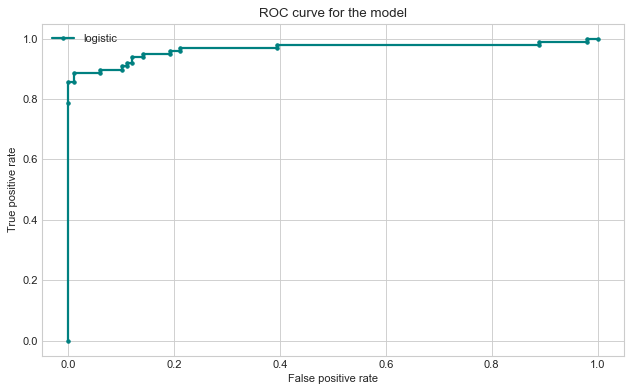

In [60]:
plt.figure(figsize = (8, 5), dpi = 80)
plt.plot(fpr, tpr, marker = '.', label = 'logistic', color = "teal", linewidth = 2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.title("ROC curve for the model: Under sampled datast", pad = -40)
plt.tight_layout()
plt.show()

### Oversampled dataset:

In [61]:
# ---- ROC curve for oversampled dataset ---
fpr_over, tpr_over, _ = roc_curve(testTarget, logistic_oversampled.predict_proba(testInputs)[:, 1]) 

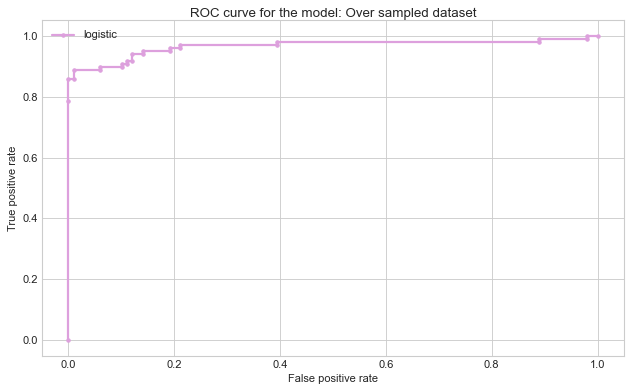

In [63]:
plt.figure(figsize=(8, 5), dpi = 80)
plt.title("ROC curve for the model: Over sampled dataset", pad = -40)
plt.plot(fpr, tpr, marker = '.', label = "logistic", color = 'plum', linewidth = 2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.tight_layout();